**DI LUO**

Spring 2020

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is a **suggested order of implementation** for completing the Transformation class's methods in transformation.py:
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.
- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `transform(C)`: Transforms the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

### Test (i): Translation

- Write a test that does the following. Note the below expected output

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [99]:
# Write your translation test here
from data import Data
from transformation import Transformation

iris_filename = 'iris.csv'
iris_data = Data(iris_filename)
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)

In [100]:
# Translation Test
t_m = iris_trans.translation_matrix(['sepal_length', 'petal_length'], [-0.5, 1.5])
print('Translation matrix:')
print(t_m)

Translation matrix:
[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [101]:
# Write your scale test here
s_m = iris_trans.scale_matrix(['sepal_width', 'petal_length'], [2, 1/3])
print('Scale matrix:')
print(s_m)

Scale matrix:
[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

### Test (iii): Rotation

* Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [5]:
# Write your rotation test here
r_m = iris_trans.rotation_matrix_3d('petal_length', 45)
print('Rotation matrix:')
print(r_m)

Rotation matrix:
[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

### Test (iv): Perform the compound rotation-translation-scaling transformation to the projected data

- Create a compound transformation matrix in the cell below that applies the above rotation, translation, and scaling (in that order). Remember the data matrix will ultimately go on the right-hand side.
- Use the `transform` method to apply it to the projected data. Print the 1st 5 samples.

In [6]:
# Write your compound RTS transformation test here
RTS = s_m @ t_m @ r_m
print('Compound transformation matrix:')
print(RTS)
transformed_data = iris_trans.transform(RTS)
print('\nTransformed data:')
print(transformed_data[:5, :])

Compound transformation matrix:
[[ 0.70711 -0.70711  0.      -0.5    ]
 [ 1.41421  1.41421  0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]

Transformed data:
[[ 0.63137 12.16224  0.96667  1.     ]
 [ 0.8435  11.17229  0.96667  1.     ]
 [ 0.56066 11.17229  0.93333  1.     ]
 [ 0.56066 10.88944  1.       1.     ]
 [ 0.48995 12.16224  0.96667  1.     ]]


    Compound transformation matrix:
    [[ 0.70711 -0.70711  0.      -0.5    ]
     [ 1.41421  1.41421  0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]
     
    Transformed data:
    [[ 0.63137 12.16224  0.96667  1.     ]
     [ 0.8435  11.17229  0.96667  1.     ]
     [ 0.56066 11.17229  0.93333  1.     ]
     [ 0.56066 10.88944  1.       1.     ]
     [ 0.48995 12.16224  0.96667  1.     ]]

## Task 2) Transformation detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

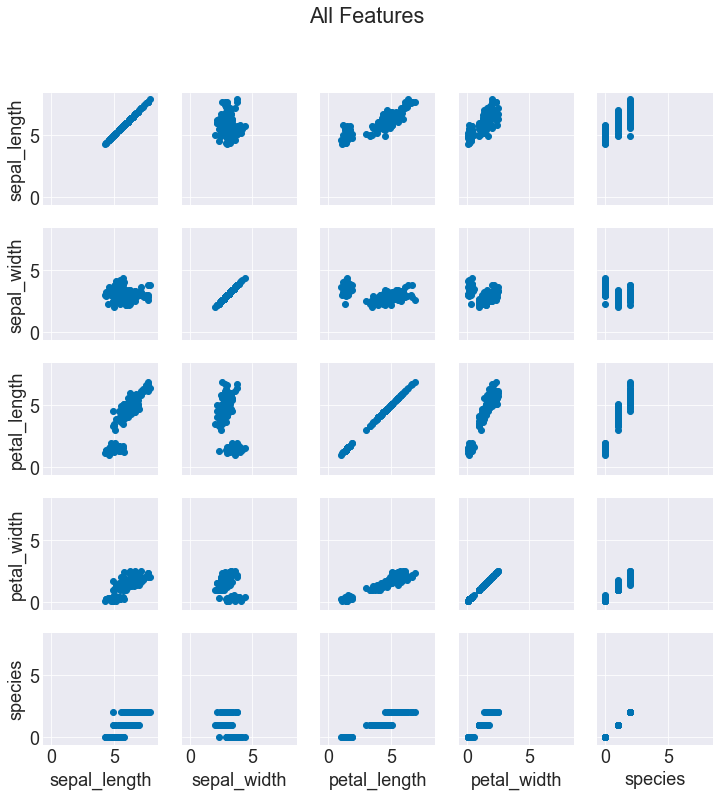

In [98]:
# Write your 2a code here
iris_filename = 'iris.csv'
iris_data = Data(iris_filename)
iris_trans = Transformation(iris_data)

headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)

fig, ax = iris_trans.pair_plot(data_vars=headers, title='All Features')

#### Your results should look like the image below.
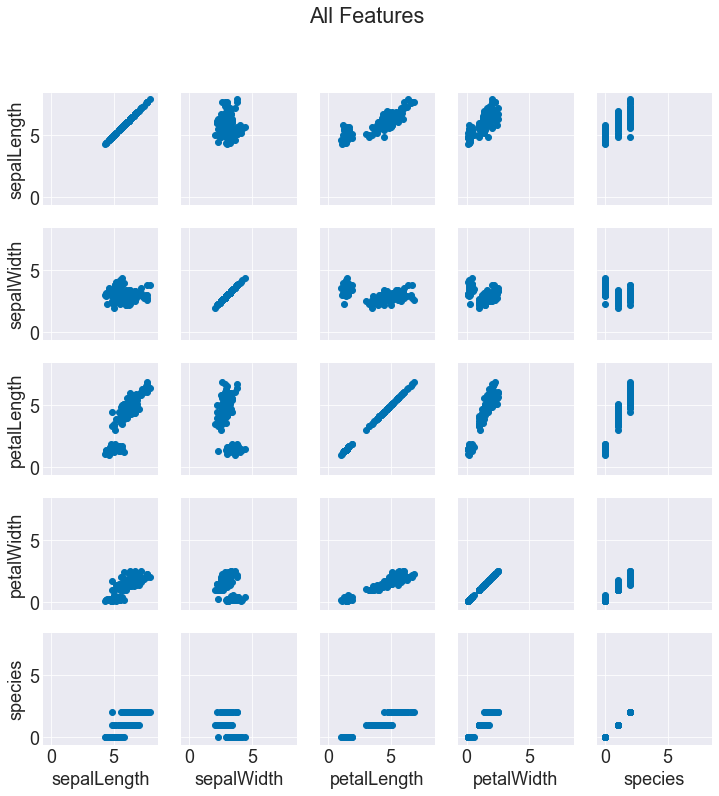

**Question 1:** How many dimensions (features) does the Iris dataset contain?

**Answer 1:** *5*

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

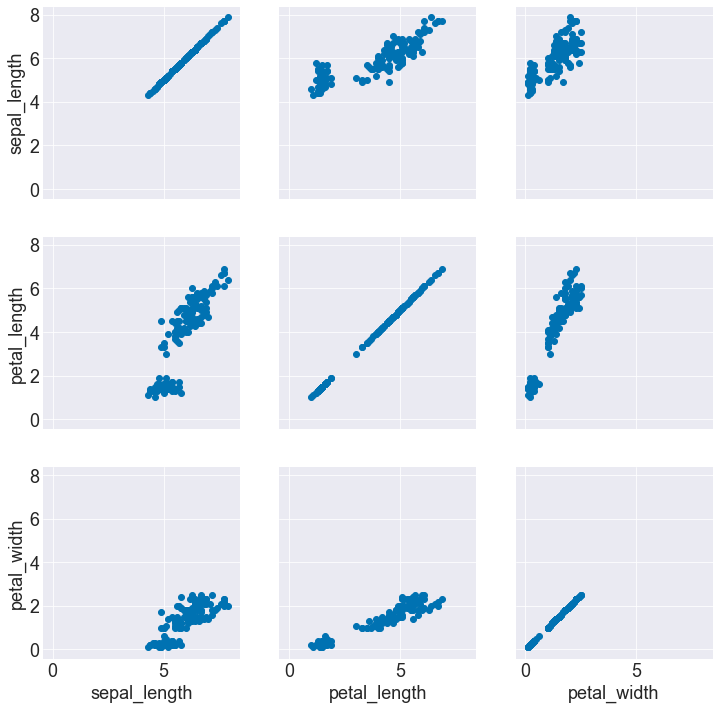

In [97]:
# Write your 2b code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'petal_length', 'petal_width']
iris_trans.project(headers)

fig, ax = iris_trans.pair_plot(data_vars=headers)

#### Your results should look like the image below.
Your results should look like those below.
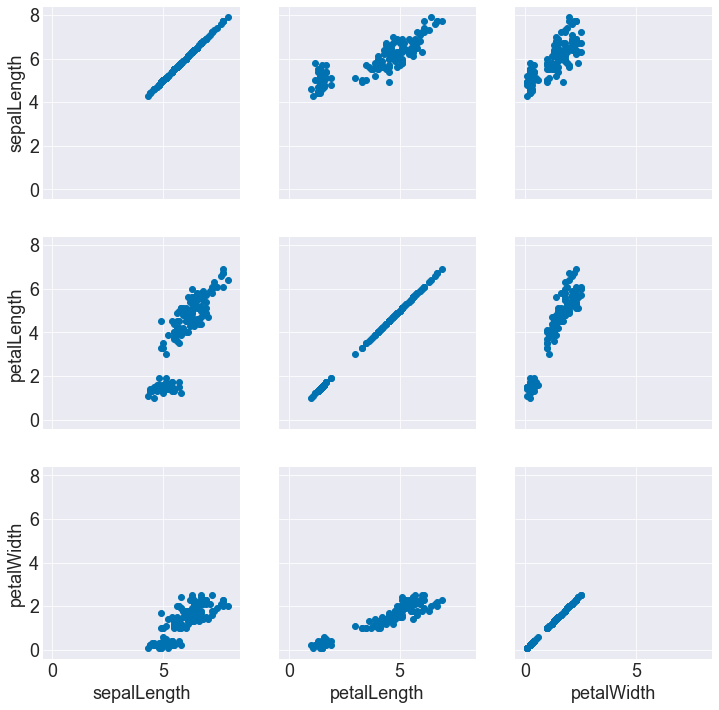

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 2:** *There are 3 dimensions in the figure, which has 2 less dimensions than the one in 2a). In addition, the shape or the location of the patter didn't change so only projection is needed.*

### 2c) Implement methods that apply a single transformation

Although you already have a method implemented to apply a compound transformation, it can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [96]:
# Write your translate test code here
iris_filename = 'iris.csv'
iris_data = Data(iris_filename)
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)

tranlated_matrix = iris_trans.translate(headers, [1,1,1])
print(tranlated_matrix[:5,:])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [95]:
# Write your scale test code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)

scaled_matrix = iris_trans.scale(headers, [0.5,0.5,0.5])
print(scaled_matrix[:5,:])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

#### Test `rotate_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [94]:
# Write your rotate 3d test code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'sepal_width', 'petal_length']
iris_trans.project(headers)

rotated_matrix = iris_trans.rotate_3d('sepal_length', 10)
print(rotated_matrix[:5,:])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

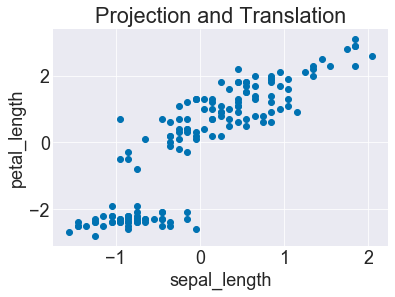

In [93]:
# Write your 2d code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'petal_length']
iris_trans.project(headers)
iris_trans.translate(headers, [-5.85, -3.80])

x,y=iris_trans.scatter('sepal_length', 'petal_length', 'Projection and Translation')
xl=plt.xlabel('sepal_length')
yl=plt.ylabel('petal_length')

#### Your results should look like the image below.
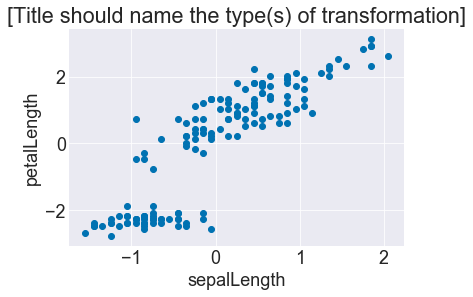

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** *There are two dimensions so projection should be used to shrink the number of dimensions from 5 to 2. Compared with the plot in 2b, this patter has the same size (can be seen from the range of data) but different location, which could be told from x-axis and y-axis, so tranlation should be used to move the data.*

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

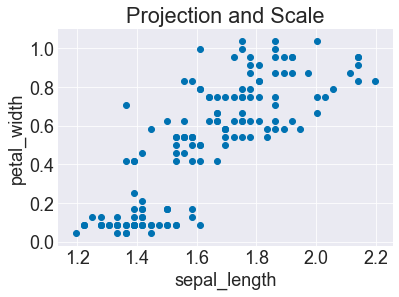

In [92]:
# Write your 2e code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'petal_width']
iris_trans.project(headers)
iris_trans.scale(headers, [0.278, 0.415])

x,y=iris_trans.scatter('sepal_length', 'petal_width', 'Projection and Scale')
xl=plt.xlabel('sepal_length')
yl=plt.ylabel('petal_width')

#### Your results should look like the plot below.
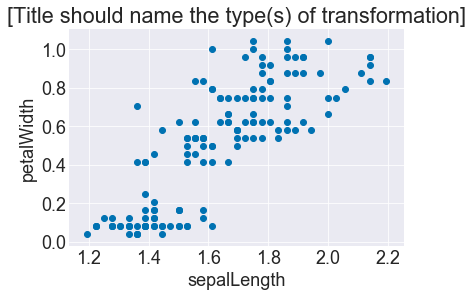

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** *There are two dimensions so **projection** should be used to shrink the number of dimensions from 5 to 2. Compared with the plot in 2b, this pattern stays in the same location in the plot but but in different size (scale) since the ranges of x or y are smaller, so scale should be used to shrink the pattern.*

### 2f) Solve transformation mystery 4

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a pair plot identical to the one below based on the projected/transformed data. 

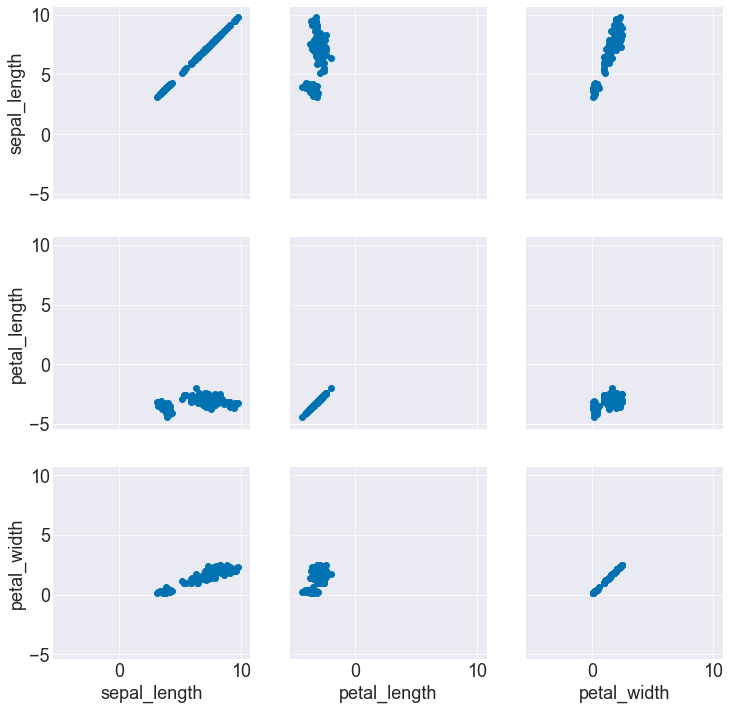

In [91]:
# Write your 2f code here
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'petal_length', 'petal_width']
iris_trans.project(headers)
iris_trans.rotate_3d('petal_width', 300)

fig, ax = iris_trans.pair_plot(data_vars=headers)

#### Your results should look like the image below.
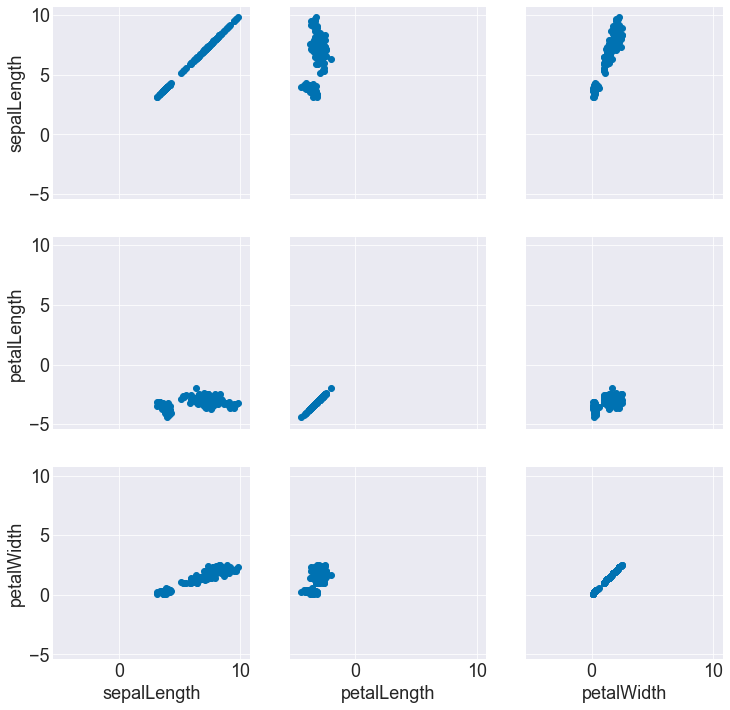

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** *The reason why projection is used is the same as 2b. There are 3 dimensions in the figure, which has 2 less dimensions than the one in 2a), so **projection** should be used. The reason why I can tell that **rotation in 3D** is used is that the shapes in the plots are similar to the ones in 2b, which are only from projection. In addition, the plot with petal_width as both x and y axis didn't change from 2b to 2f, showing that the rotation was along petal_width, which is the z-axis.*

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:
1. All the variables together (entire matrix).
2. All the variables separately/independently.

Implement the following methods to perform each of these operations:
- `normalize_together`: 
- `normalize_separately`: 

### 3a ) Normalize together

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

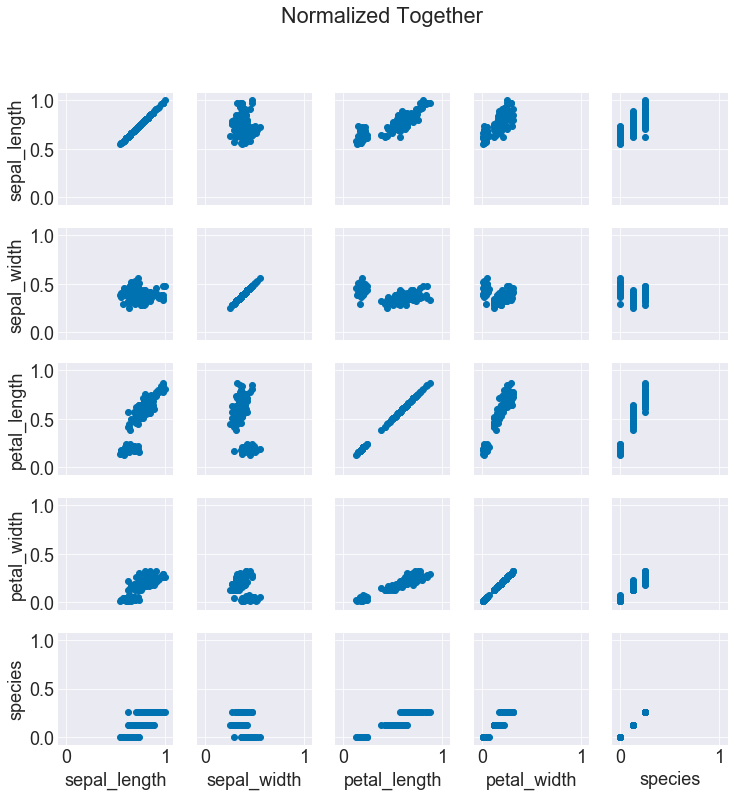

In [90]:
# Write your 3a code here
iris_trans = Transformation(iris_data)

headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)
Nor_toge = iris_trans.normalize_together()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Together')


#### Your results should look like the image below.
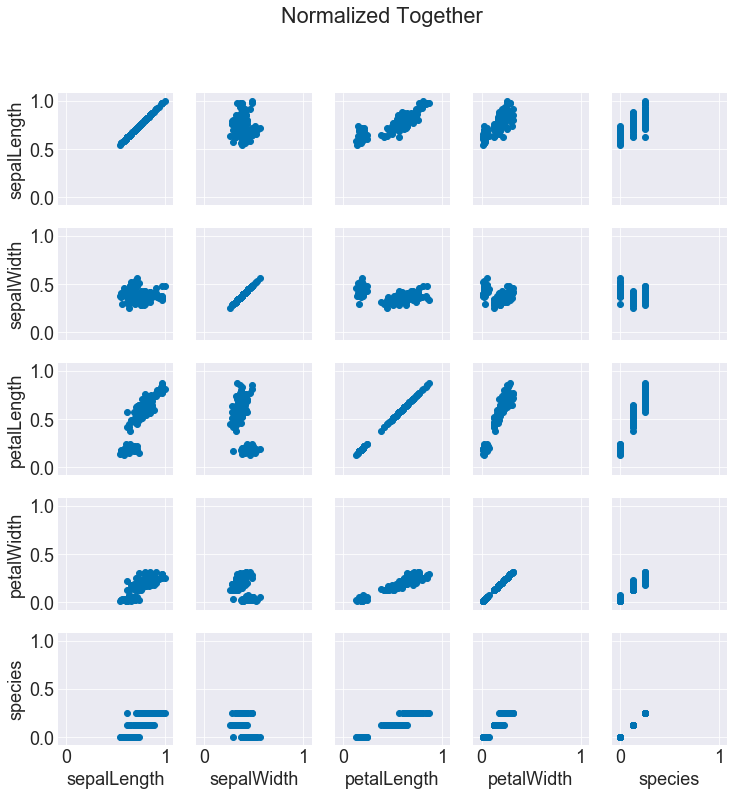

### 3b) Normalize Separately
- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

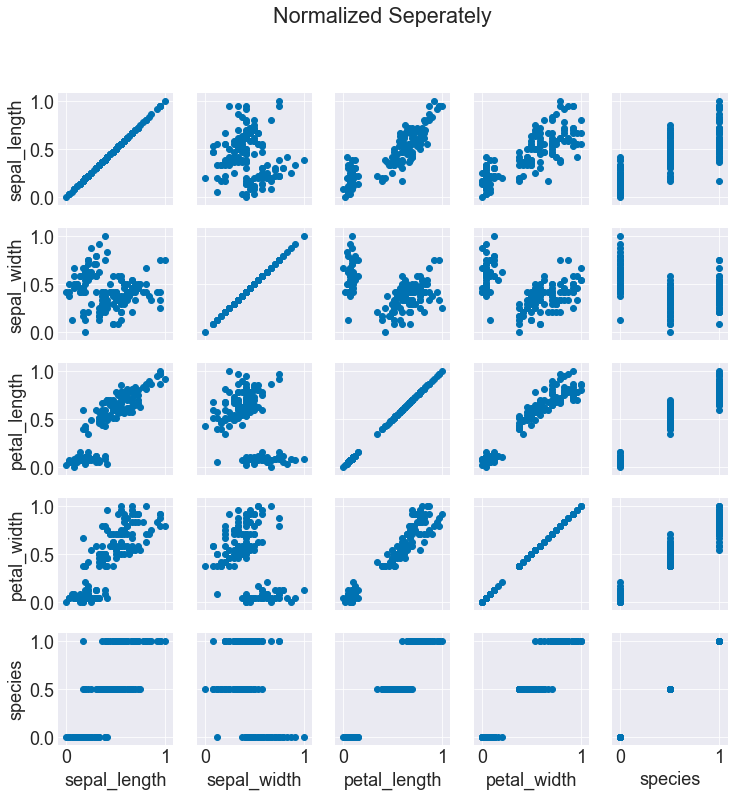

In [89]:
# Write your 3b code here
iris_trans = Transformation(iris_data)

headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)
Nor_sepe = iris_trans.normalize_separately()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Seperately')

Your results should look like the image below.
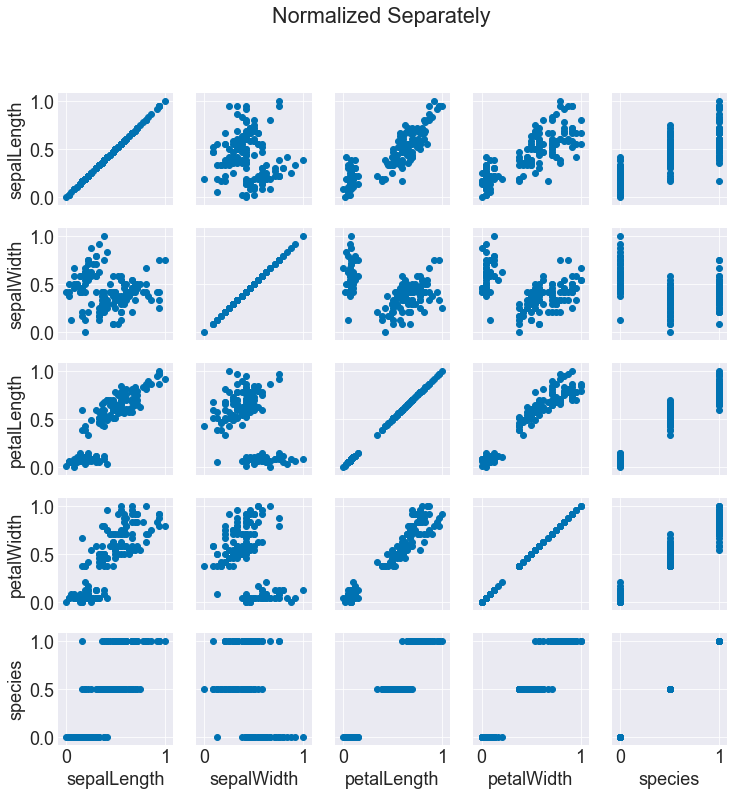

**Question 6:** What type(s) of transformation does normalization require?

**Answer 6:** *Tranlation and scale.*

### 3c) Analysis challenge

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Determine the set of transformations to apply to them.
- Create a pair plot identical to the one below based on the projected/transformed data. 

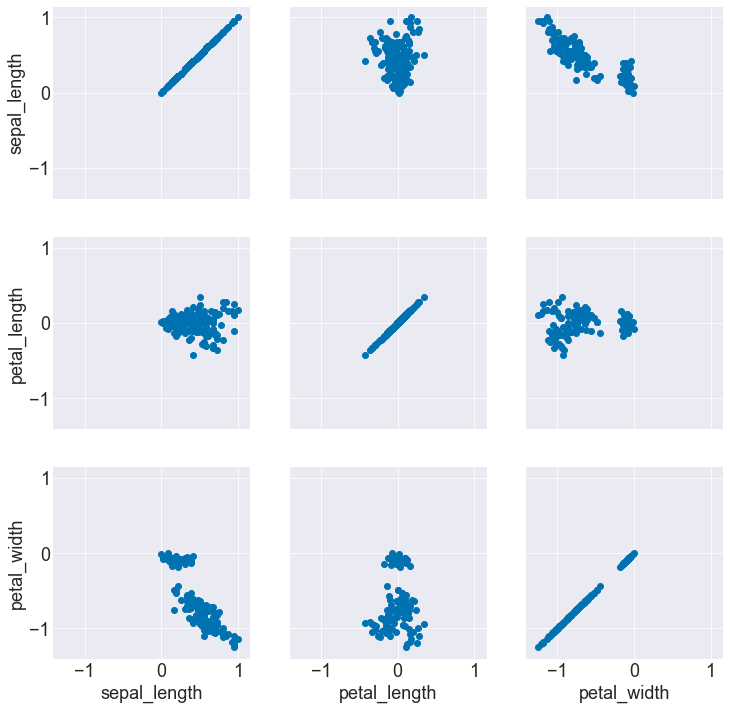

In [87]:
# Write your 3c code here

# Make a Transformation object with the Iris data
iris_trans = Transformation(iris_data)

# Determine the set of variables to project onto to recreate the image below
headers = ['sepal_length', 'petal_length', 'petal_width']
iris_trans.project(headers)

# Determine the set of transformations to apply to them
iris_trans.rotate_3d('sepal_length', 248)
iris_trans.translate(headers, [-4.3, 0.3, 1])
iris_trans.scale(headers, [0.28, -0.7, 0.2])

# Create a pair plot identical to the one below based on the projected/transformed data
fig, ax = iris_trans.pair_plot(data_vars=headers)


Your results should look like the image below.
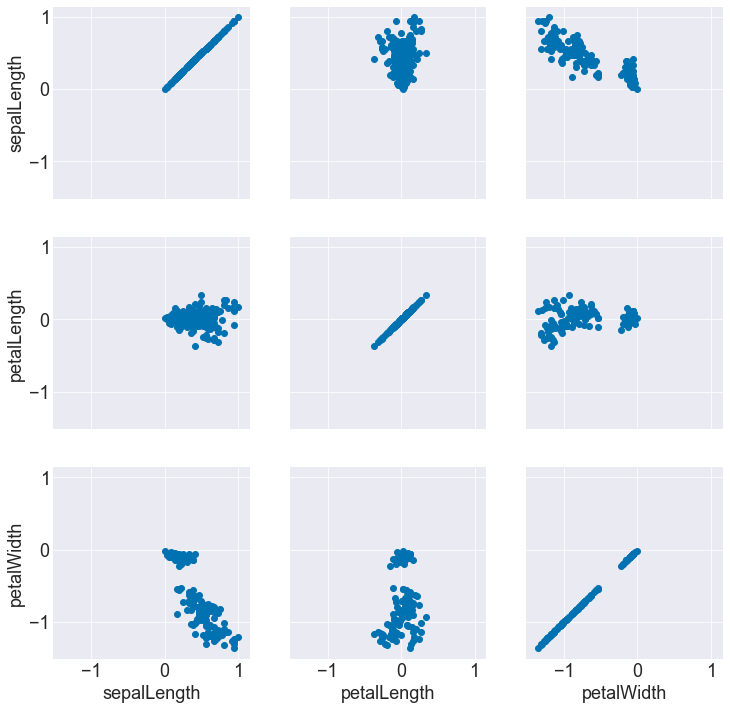

## Task 4) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 4a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - **Section B (Linear Algebra):** Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before plotting.

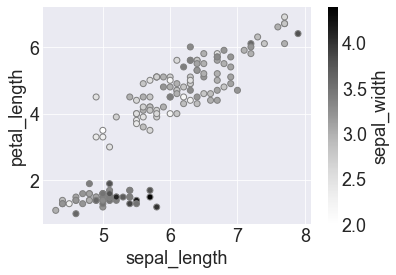

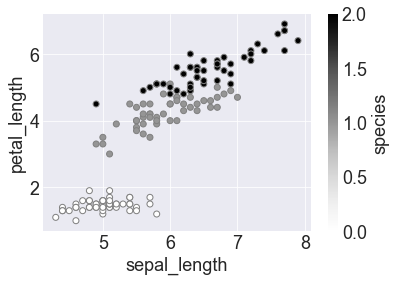

In [86]:
# Write your 4a code here
iris_trans = Transformation(iris_data)

headers1 = ['sepal_length', 'petal_length', 'sepal_width']
headers2 = ['sepal_length', 'petal_length', 'species']

# palettable.colorbrewer.sequential.Greys_9 was used to implement the color scale

iris_trans.project(headers1)
iris_trans.scatter_color('sepal_length', 'petal_length', 'sepal_width')

iris_trans.project(headers2)
iris_trans.scatter_color('sepal_length', 'petal_length', 'species')

#### Your results should look like the following
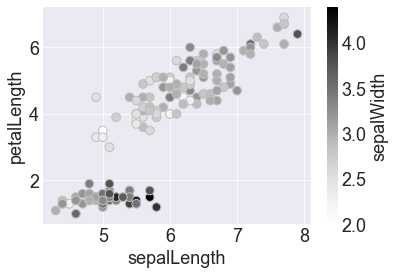
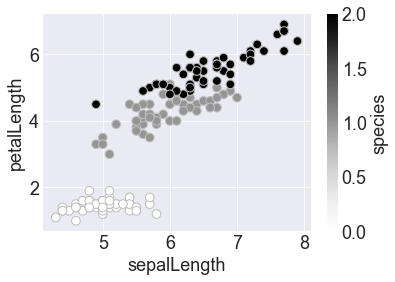

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 7:** *Color is a more useful representation of discrete features. For continuous features, the color differences between different data points can be undistinguishable since two data points with similar data have almost the same color. While for discrete features, there are bigger differences between each group of data so the color difference can be obvious, like the second scatterplot above, so that it clearly shows the grouping of data.*

### 4b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.

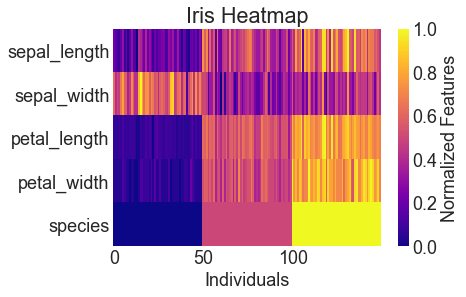

In [84]:
# Write your 4b code here
iris_trans = Transformation(iris_data)

headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)

fig, ax = iris_trans.heatmap(title='Iris Heatmap', cmap='plasma')

#### Your results should look like the image below.
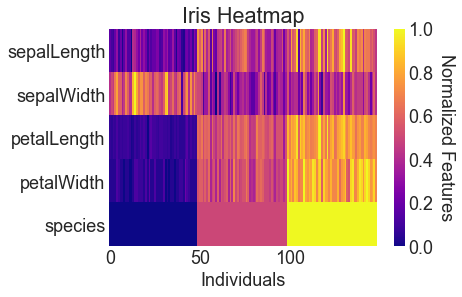

**Question 8:** Does color help you see any patterns in this heatmap that were difficult to see in the scatterplots?

**Question 9:** Are there any characteristics of iris.csv support the readability of this heatmap? Explain your answer.

**Answer 8:** *Yes. The color shows that there are clear differences between different species. Each specie has a mean in each variable that is highly different from another specie. While in scatterplots, this identity is not obvious. In addition, with heatmap, we can easily see that in each variable, each specie has an average value (mean), which is shown by the general color or the block.*

**Answer 9:** *The data in iris.csv can be divided into 3 groups according to the variable `species`, and in each specie, the samples share similarities in data so that their data are much higher or lower than the data of another specie. The variable `species` also functionizes as a reference substance, which makes the data pattern easy to be observed. In addition, between different species, the data of each variable have big differences so that the heatmap is divided into many rectangles that differentiate from adjacent ones.*

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

I created scatter_size( ) based on scatter_color( ) in transformation.py to implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data. The following test code use `scatter_size()` method to recreate the images below.
- One with headers [`sepal_length`, `petal_length`, `sepal_width`].
- Another with headers [`sepal_length`, `petal_length`, `species`].

Similar to scatter_color( ), size is a more useful representation of discrete features. For continuous features, the size differences between different data points are not obvious since two data points with similar data have almost the same size. While for discrete features, there are bigger differences between each group of data so the size differences are easier to see.
   

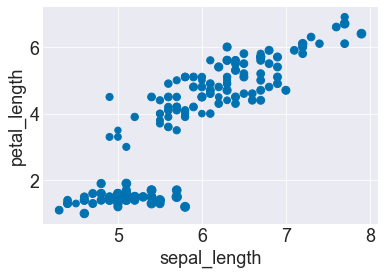

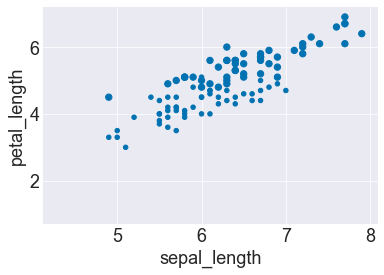

In [102]:
iris_trans = Transformation(iris_data)

headers1 = ['sepal_length', 'petal_length', 'sepal_width']
headers2 = ['sepal_length', 'petal_length', 'species']

iris_trans.project(headers1)
iris_trans.scatter_size('sepal_length', 'petal_length', 'sepal_width')

iris_trans.project(headers2)
iris_trans.scatter_size('sepal_length', 'petal_length', 'species')

I also implement a scatter plot version that uses both color and marker size aesthetics in scatter_colorNsize( ). Below is the test code that draws the 5D scatterplot, in which `sepal_length` is the x-axis, `sepal_width` is the y-axis, `petal_length` is the z-axis, `petal_width` is the color scale and `species` is indicated by marker size. Although the graph plots 5 data variables in one graph, the relationship between each variable is not obvious since there are so many scales. In addition, the 3D graph is not good to display the data since it's hard to tell the location of data points and match its location with the axis. 

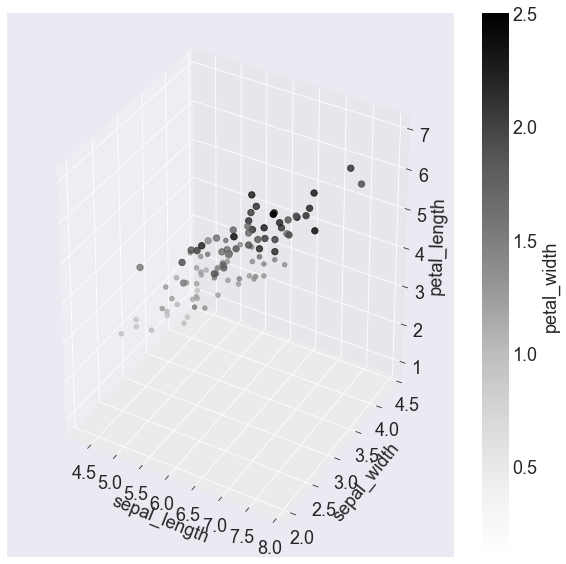

In [103]:
iris_trans = Transformation(iris_data)
headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)

iris_trans.scatter_colorNsize('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species')

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

**Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations)**
I created two normalization functions using numpy vectorization instead of matrix multiplication, which are `normalize_together_vectorization()` and `normalize_separately_vectorization`. To start with, I compare the result of using matrix multiplication and using numpy vectorization to see if I correctly implement the functions. In addition, I measure the time that each function used to normalize.

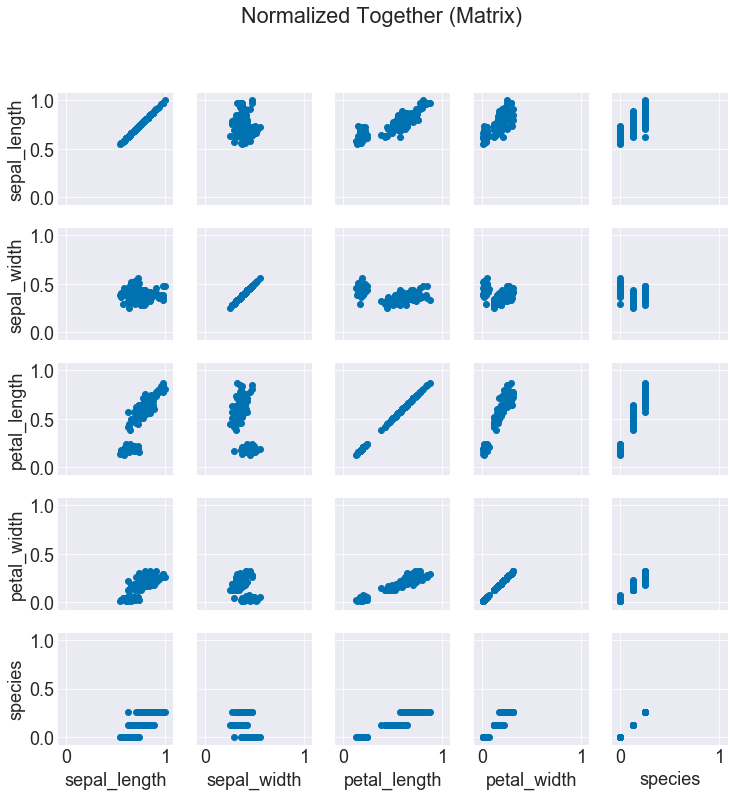

In [104]:
iris_trans = Transformation(iris_data)
headers = iris_trans.data_orig.get_headers()
iris_trans.project(headers)
Nor_toge = iris_trans.normalize_together()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Together (Matrix)')

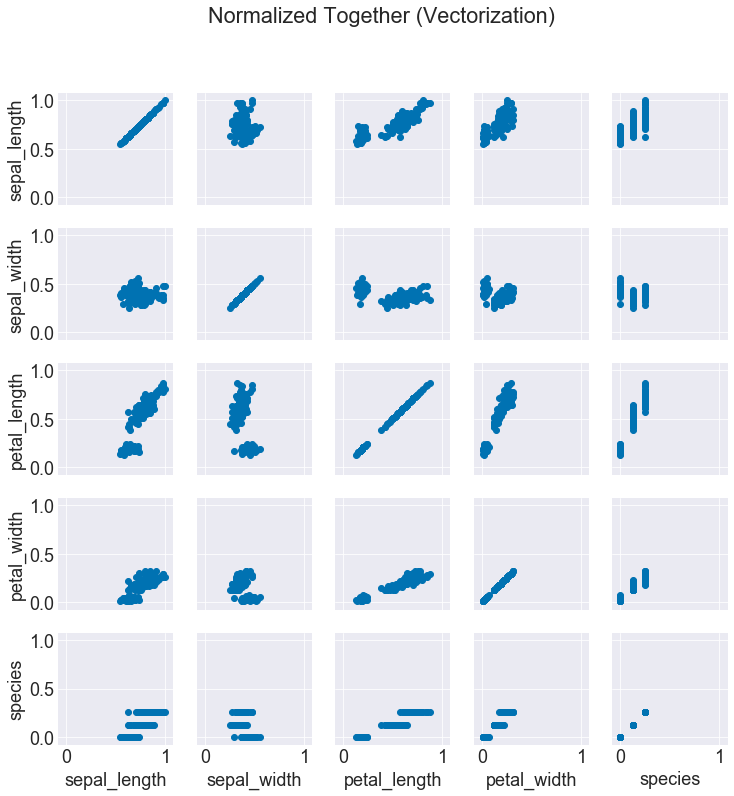

In [108]:
iris_trans.project(headers)
Nor_toge_v = iris_trans.normalize_together_vectorization()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Together (Vectorization)')

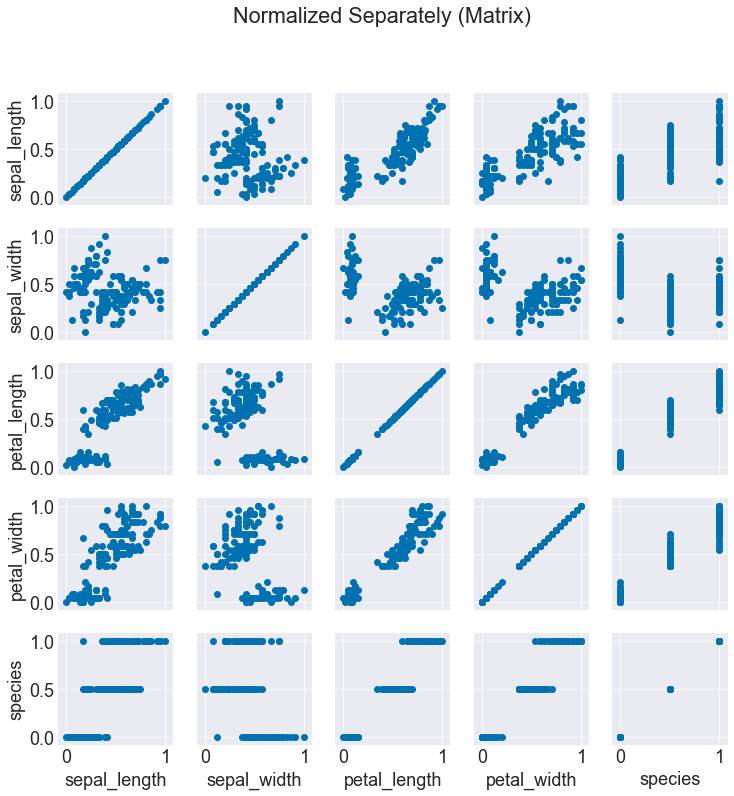

In [111]:
iris_trans.project(headers)
Nor_Sepe = iris_trans.normalize_separately()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Separately (Matrix)')

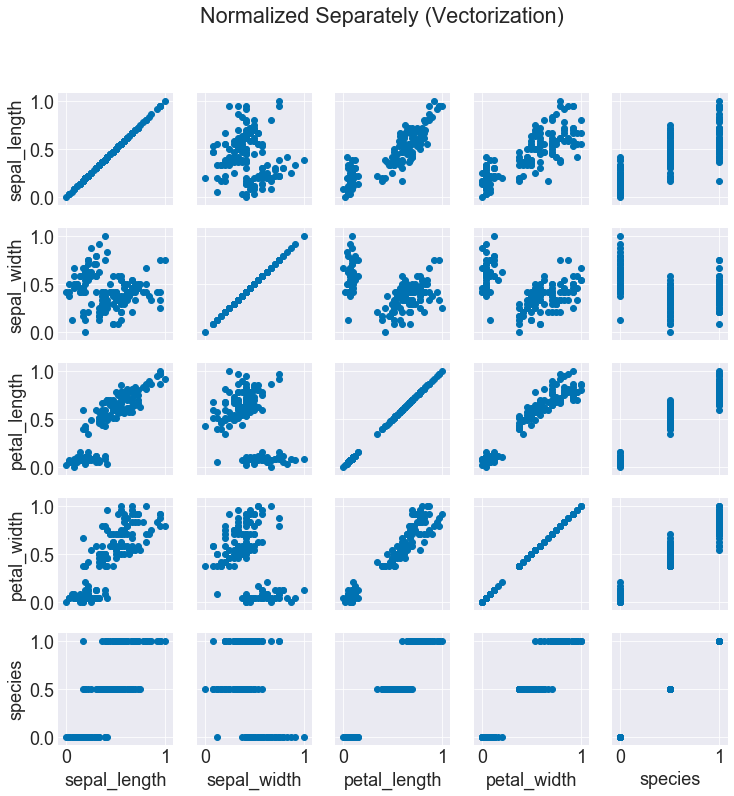

In [116]:
iris_trans.project(headers)
Nor_Sepe_v = iris_trans.normalize_separately_vectorization()

fig, ax = iris_trans.pair_plot(data_vars=headers, title='Normalized Separately (Vectorization)')

In [117]:
import time

In [121]:
def timer(fun):
    '''Just a function to time the runtime of another function'''
    start = time.time()
    fun()
    end = time.time()
    print(f'Took {end - start:.3} secs to run.')

In [141]:
iris_trans.project(headers)

# Time normalize_together
print('normalize_together_matrix_multiplication:')
timer(iris_trans.normalize_together)
# Time normalize_together_vectorization
print('normalize_together_vectorization:')
timer(iris_trans.normalize_together_vectorization)
print('\n')

# Time normalize_separately
print('normalize_separately_matrix_multiplication:')
timer(iris_trans.normalize_separately)
# Time normalize_separately_vectorization
print('normalize_separately_vectorization:')
timer(iris_trans.normalize_separately_vectorization)

normalize_together_matrix_multiplication:
Took 0.00103 secs to run.
normalize_together_vectorization:
Took 0.000394 secs to run.


normalize_separately_matrix_multiplication:
Took 0.001 secs to run.
normalize_separately_vectorization:
Took 0.000651 secs to run.


The graphs shows that the functions are correctly implemented. Regarding the efficiency, the time test above shows that vectorization/broadcasting is more efficient than matrix multiplication. This is because vectorization allows Numpy to stop searching at runtime and use efficient pre-compiled functions to batch-process the computation over the matrix. While for matrix multiplication, the program needs to create the matrices and multiply them, which takes more time.

### 3. Implement and use 2D rotation

2D rotation means that the shape in 2D would rotate along the virtual z-axis that actually doesn't exist. Compared with 3D rotation, the variable along which the rotation should be conducted on is no longer needed to be indicated since the 2D rotation is always along the virtual z-axis. So I created rotation_matrix_2d() and rotate_2d() in transformation.py and both functions take 1 parameter: degrees to rotate. Below is the test code for the functions.

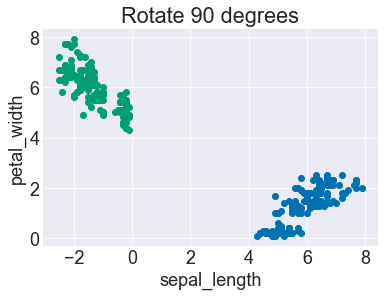

In [142]:
iris_trans = Transformation(iris_data)

headers = ['sepal_length', 'petal_width']
iris_trans.project(headers)

x,y=iris_trans.scatter('sepal_length', 'petal_width', 'Original')

iris_trans.project(headers)
iris_trans.rotate_2d(90)
x,y=iris_trans.scatter('sepal_length', 'petal_width', 'Rotate 90 degrees')
xl=plt.xlabel('sepal_length')
yl=plt.ylabel('petal_width')


This function can be more efficient than using rotation in 3D when the user only wants to deal with 2 variables. 

### 4. Apply matrix transformations and visualization a dataset of your choice